## Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline 

## Loading Data

In [2]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Data Preprocessing

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

In [7]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [8]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [9]:
data.Month.unique()

array([1, 3, 2])

## Anova Gross Income

In [10]:
# membuat variabel sampel df_anova 
df_anova = data[['gross income', 'Customer type']]
print(df_anova.head())
print('\n')

# membuat variabel values dari Customer type
grps = pd.unique(data['Customer type'].values)
print("Customer type: \n")
print(grps)
print('\n')

# membuat variabel d_data
d_data = {grp: df_anova['gross income'][data['Customer type'].values == grp] for grp in grps}
print("d_data: \n", d_data)
print("\n")

# p_value
t,p_value = stats.f_oneway(d_data['Member'], d_data['Normal'])
print("P Value: \n", p_value)
print("\n")

# menentukan nilai Confidence Interval
confidence_interval = 0.95
print("Confidence Interval: \n", confidence_interval)
print("\n")

# menentukan nilai kritis (alpha)
alpha = 0.05
print("Critical Value (alpha): \n", alpha)
print("\n")


# Menentukan hasil Hypothesis Testing
print("Hasil Uji Hypothesis: \n")
if p_value < alpha :
    print("Hypothesis (H0) ditolak, kemungkinan adanya perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)  ")
else:
    print("Hypothesis (H0) diterima, kemungkinan tidak ada perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)")

   gross income Customer type
0       26.1415        Member
1        3.8200        Normal
2       16.2155        Normal
3       23.2880        Member
4       30.2085        Normal


Customer type: 

['Member' 'Normal']


d_data: 
 {'Member': 0      26.1415
3      23.2880
6      20.6520
8       3.6260
9       8.2260
        ...   
988    41.1700
989    30.1480
994     3.0475
997     1.5920
999    30.9190
Name: gross income, Length: 501, dtype: float64, 'Normal': 1       3.8200
2      16.2155
4      30.2085
5      29.8865
7      36.7800
        ...   
992     5.8030
993     8.7450
995     2.0175
996    48.6900
998     3.2910
Name: gross income, Length: 499, dtype: float64}


P Value: 
 0.534394959614115


Confidence Interval: 
 0.95


Critical Value (alpha): 
 0.05


Hasil Uji Hypothesis: 

Hypothesis (H0) diterima, kemungkinan tidak ada perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)


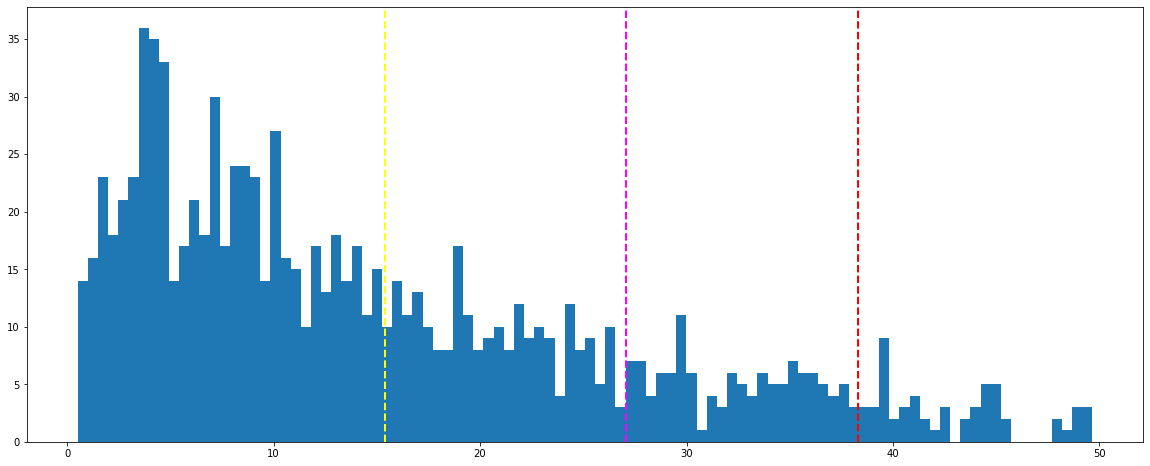

In [11]:
# menghitung 90% Confidence Interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.95, data['gross income'].mean(), data['gross income'].std())


plt.figure(figsize=(20,8))
plt.hist(data['gross income'], bins=100)

# show the hypothesized population mean
plt.axvline(data['gross income'].mean(), color='yellow', linestyle='dashed', linewidth=2)

# melihat garis the right-tail Confidence Interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)

# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(data['gross income'].mean() + data['gross income'].std(), color='magenta', linestyle='dashed', linewidth=2)

plt.show();

## Anova Total Penjualan

In [12]:
# membuat variabel sampel df_anova 
df_anova = data[['Total', 'Customer type']]
print(df_anova.head())
print('\n')

# membuat variabel values dari Customer type
grps = pd.unique(data['Customer type'].values)
print("Customer type: \n")
print(grps)
print('\n')

# membuat variabel d_data
d_data = {grp: df_anova['Total'][data['Customer type'].values == grp] for grp in grps}
print("d_data: \n", d_data)
print("\n")

# p_value
t,p_value = stats.f_oneway(d_data['Member'], d_data['Normal'])
print("P Value: \n", p_value)
print("\n")

# menentukan nilai Confidence Interval
confidence_interval = 0.95
print("Confidence Interval: \n", confidence_interval)
print("\n")

# menentukan nilai kritis (alpha)
alpha = 0.05
print("Critical Value (alpha): \n", alpha)
print("\n")


# Menentukan hasil Hypothesis Testing
print("Hasil Uji Hypothesis: \n")
if p_value < alpha :
    print("Hypothesis (H0) ditolak, kemungkinan adanya perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)  ")
else:
    print("Hypothesis (H0) diterima, kemungkinan tidak ada perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)")

      Total Customer type
0  548.9715        Member
1   80.2200        Normal
2  340.5255        Normal
3  489.0480        Member
4  634.3785        Normal


Customer type: 

['Member' 'Normal']


d_data: 
 {'Member': 0      548.9715
3      489.0480
6      433.6920
8       76.1460
9      172.7460
         ...   
988    864.5700
989    633.1080
994     63.9975
997     33.4320
999    649.2990
Name: Total, Length: 501, dtype: float64, 'Normal': 1        80.2200
2       340.5255
4       634.3785
5       627.6165
7       772.3800
         ...    
992     121.8630
993     183.6450
995      42.3675
996    1022.4900
998      69.1110
Name: Total, Length: 499, dtype: float64}


P Value: 
 0.534394959614115


Confidence Interval: 
 0.95


Critical Value (alpha): 
 0.05


Hasil Uji Hypothesis: 

Hypothesis (H0) diterima, kemungkinan tidak ada perbedaan signifikan antara rata-rata gross income dari kategori Member dan Normal (variabel Customer type)


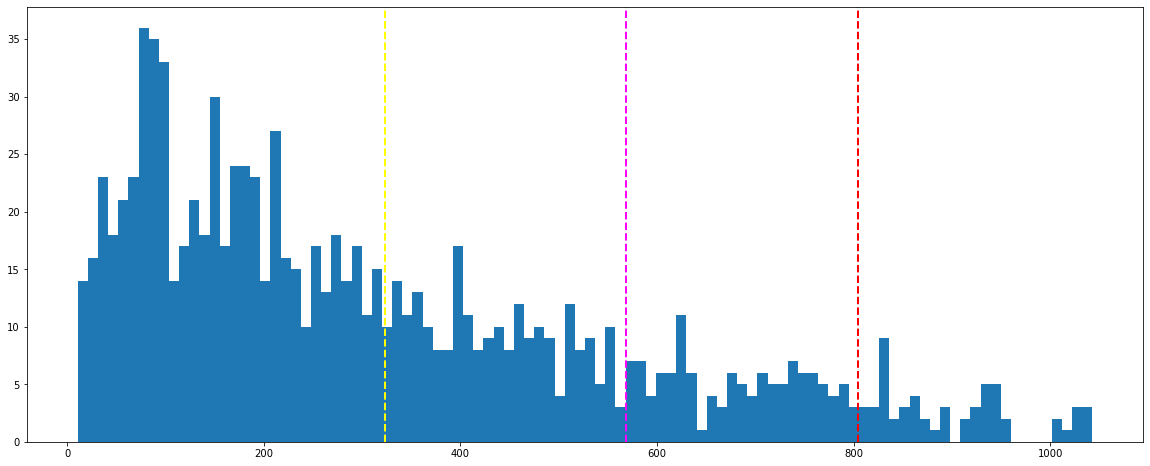

In [13]:
# menghitung 90% Confidence Interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.95, data['Total'].mean(), data['Total'].std())


plt.figure(figsize=(20,8))
plt.hist(data['Total'], bins=100)

# show the hypothesized population mean
plt.axvline(data['Total'].mean(), color='yellow', linestyle='dashed', linewidth=2)

# melihat garis the right-tail Confidence Interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)

# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(data['Total'].mean() + data['Total'].std(), color='magenta', linestyle='dashed', linewidth=2)

plt.show();